<a href="https://www.kaggle.com/code/muhammadasifwazir/build-simple-cnn-for-cifar-10-dataset?scriptVersionId=197343501" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Problems we Face**

1. **Overfiting Occurs:** Because we have High Training Accuracy and Lower Validation Accuracy
- Epoch 50/50: 1563/1563 - 3s - 2ms/step - accuracy: 0.8718 - loss: 0.3880 - val_accuracy: 0.5502 - val_loss: 2.6132
2. **Underfiting Occure:** Because we have Low Training Accuracy and High Validation Accuracy
- Epoch 5/50: 1563/1563 - 3s - 2ms/step - accuracy: 0.0978 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
## **Steps to Address Overfitting**

1. Data agumentation
2. add Dropout layers
3. Early Stoping
4. introduce learning rate

# **IMPORT LIBARIES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn as sk

# **DATASET LOADING**

In [3]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## **Avoid Overfiting Technique: Data Augumentation**

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator to your training data
datagen.fit(x_train)

# **EXPLORING DATASET**

In [5]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


# **VISUALIZATION**

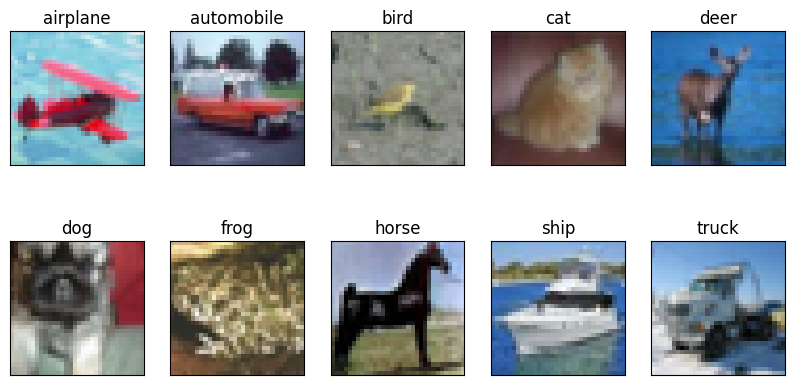

In [6]:
# plotting some random 10 images
num_classes = 10

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']


fig = plt.figure(figsize=(10,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

# **SPLITING DATASET**
- **TRAIN AND TEST DATA SPLITING**

# **Pre-Processing**
- **OneHot encoding**

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# **Building The Neural Network**

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#from keras.layers import Dense

In [9]:
from tensorflow.keras.layers import Dropout

# Create the model with Dropout

model = Sequential()


# Add a Conv2D layer (for 32x32x3 images)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# Add a MaxPooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten the output to feed into Dense layers
model.add(Flatten())


# 8 Neurons, expects input of 4 features. 
# Play around with the number of neurons!!
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer
# Add another Densely Connected layer (every neuron connected to every neuron in the next layer)
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))  # Dropout layer
# Last layer simple sigmoid function to output 0 or 1 (our label)
model.add(Dense(10, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## **Compile the model**

In [10]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

## **Avoid Overfitting Technique: Early Stoping**

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

## **MODEL TRAINING**

In [12]:
history = model.fit(x_train, y_train,batch_size=32,
          epochs=50, verbose=2, 
          validation_data=(x_test, y_test), 
          callbacks=[early_stopping])

Epoch 1/50


I0000 00:00:1726770380.497894      71 service.cc:145] XLA service 0x7a09c8005770 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726770380.497963      71 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726770380.497969      71 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1726770384.594696      71 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 - 12s - 8ms/step - accuracy: 0.0976 - loss: 2.5176 - val_accuracy: 0.1003 - val_loss: 2.3025
Epoch 2/50
1563/1563 - 4s - 2ms/step - accuracy: 0.0996 - loss: 2.3030 - val_accuracy: 0.1002 - val_loss: 2.3025
Epoch 3/50
1563/1563 - 4s - 2ms/step - accuracy: 0.0988 - loss: 2.3033 - val_accuracy: 0.1002 - val_loss: 2.3025
Epoch 4/50
1563/1563 - 4s - 2ms/step - accuracy: 0.0985 - loss: 2.3033 - val_accuracy: 0.1001 - val_loss: 2.3025
Epoch 5/50
1563/1563 - 4s - 2ms/step - accuracy: 0.0969 - loss: 2.3029 - val_accuracy: 0.1005 - val_loss: 2.3020
Epoch 6/50
1563/1563 - 4s - 2ms/step - accuracy: 0.0992 - loss: 2.3028 - val_accuracy: 0.1003 - val_loss: 2.3023
Epoch 7/50
1563/1563 - 4s - 2ms/step - accuracy: 0.0977 - loss: 2.3027 - val_accuracy: 0.1005 - val_loss: 2.3020
Epoch 8/50
1563/1563 - 4s - 2ms/step - accuracy: 0.1005 - loss: 2.3029 - val_accuracy: 0.1005 - val_loss: 2.3019
Epoch 9/50
1563/1563 - 4s - 2ms/step - accuracy: 0.0976 - loss: 2.3022 - val_accuracy: 0.1004 - val_loss: 

In [13]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       460,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,399,712 (5.34 MB)

 Trainable params: 466,570 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 933,142 (3.56 MB)

None


# **Evaluating Model**

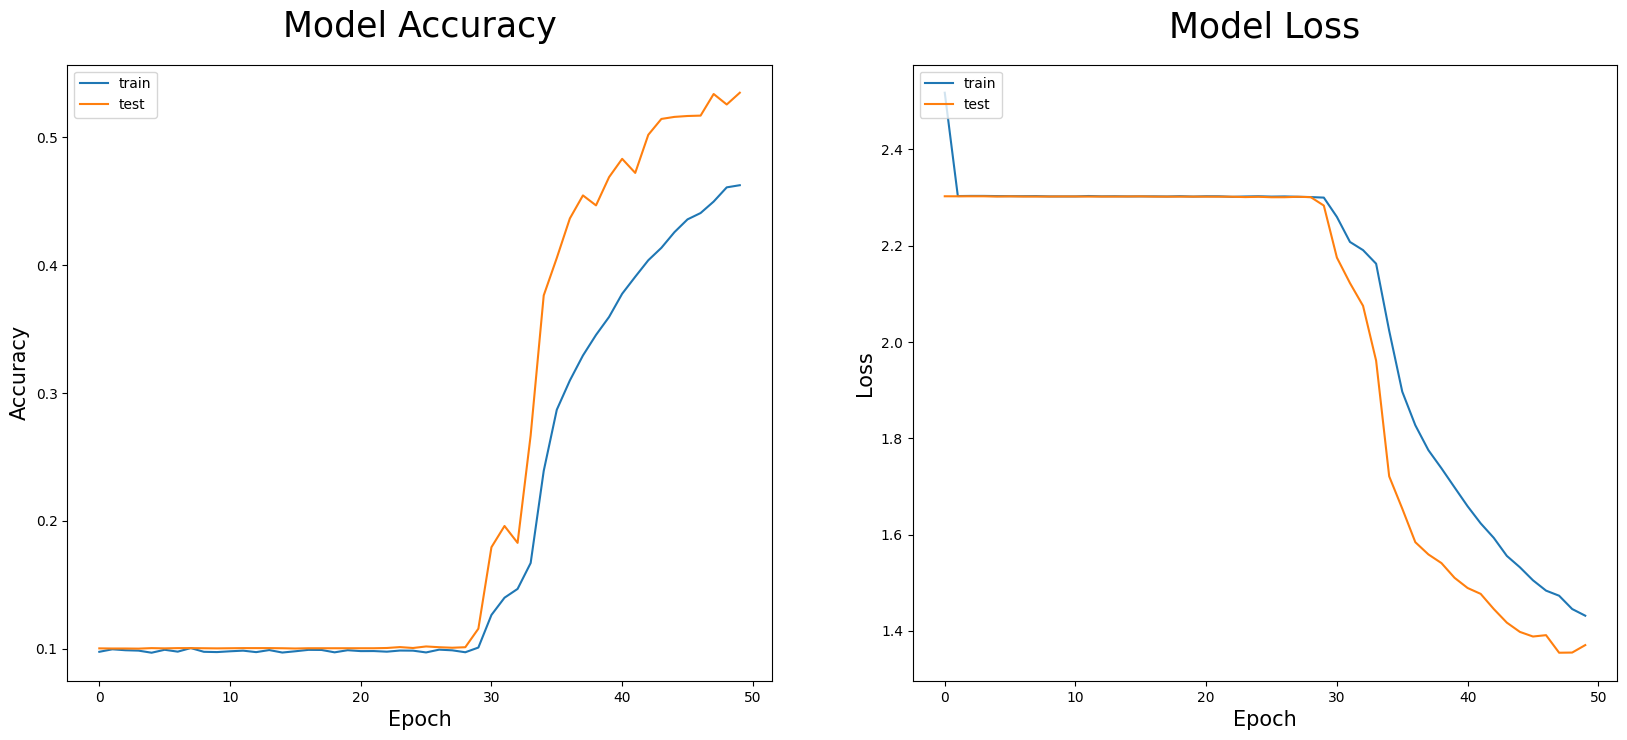

In [14]:
# Plotting the Model Accuracy & Model Loss vs Epochs (Hidden Input)
plt.figure(figsize=[20,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Model Prediction**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


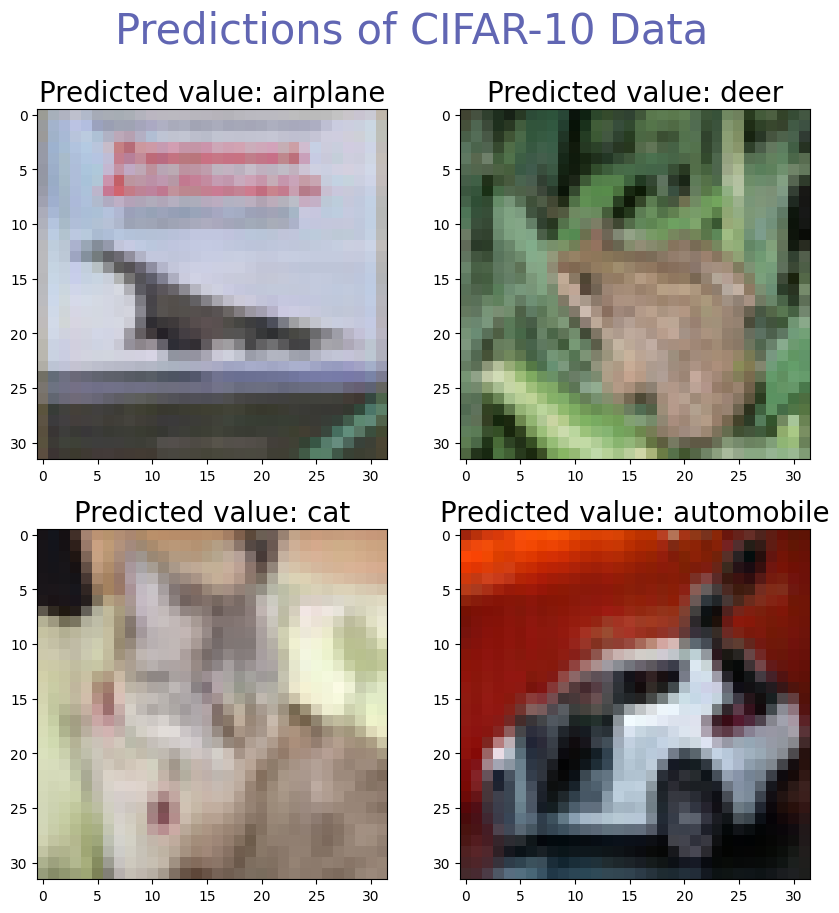

In [15]:
# Checking the predictions! (Hidden Input)
predictions = model.predict(x_test)

plt.figure(figsize=[10,10])

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.subplot(2,2,1)
n = 3
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,2)
n = 4
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,3)
n = 8
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,4)
n = 6
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.suptitle("Predictions of CIFAR-10 Data", size=30, color="#6166B3")

plt.show()

# **Saving and Loading Models**